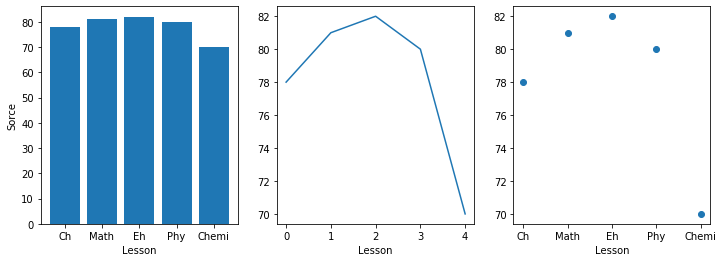

In [1]:
# No.1
# 画柱状图，折线图，散点图
# 姓名:李昊佳
import matplotlib.pyplot as plt

data = {'Ch':78, 'Math':81, 'Eh' :82, 'Phy':80, 'Chemi':70}

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.bar(list(data.keys()),list(data.values()))#注意keys()是方法，最后转化为列表
plt.xlabel("Lesson")
plt.ylabel("Sorce")
plt.subplot(1,3,2)
plt.plot(list(data.values()))
plt.xlabel("Lesson")

plt.subplot(1,3,3)
plt.scatter(list(data.keys()),list(data.values()))
plt.xlabel("Lesson")

plt.show()

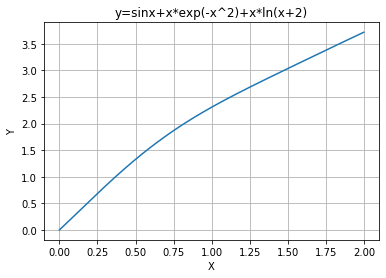

In [2]:
# No.2
# 画函数
# 姓名:李昊佳
import matplotlib.pyplot as plt
import numpy as np

x=np.arange(0,2,0.001)
y=np.sin(x)+x*np.exp(-x**2)+x*np.log(x+2)
plt.plot(x,y)
plt.grid(True)
plt.xlabel('X')
plt.ylabel("Y")
plt.title("y=sinx+x*exp(-x^2)+x*ln(x+2)")
plt.show()

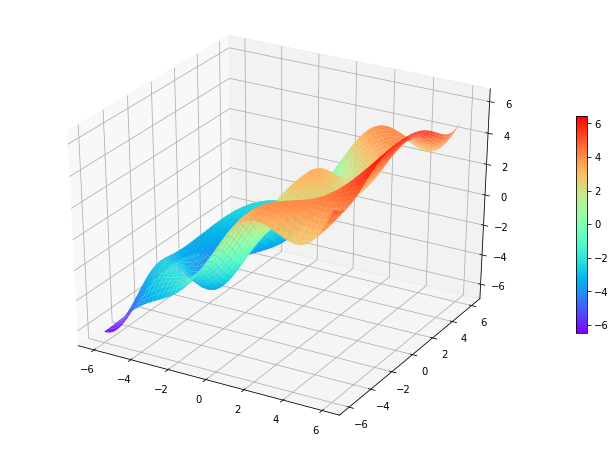

In [3]:
# No.3
# 画曲面
# 姓名:李昊佳
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np

x,y=np.meshgrid(np.linspace(-6,6,100),np.linspace(-6,6,100))
z=np.sin(np.sqrt(2*x**2+2*y**2))+np.sin(x)+x
plt.figure(figsize=(12,8))
axes = plt.subplot(projection='3d')
p = axes.plot_surface(x, y, z,cmap='rainbow')
plt.colorbar(p,shrink=0.5)
plt.show()


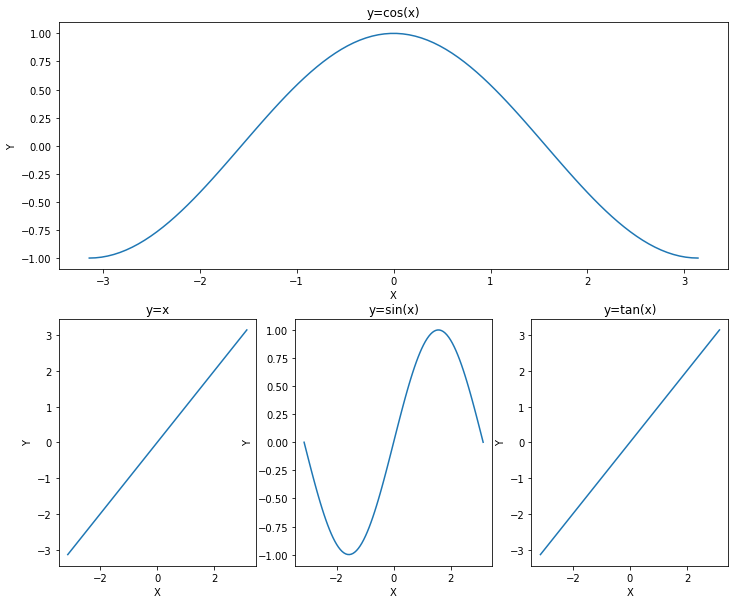

In [4]:
# No.4
# 不规则子图
# 姓名:李昊佳
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(-np.pi,np.pi,100)
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
y1=np.cos(x)
plt.plot(x,y1)
plt.title('y=cos(x)')
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(2,3,4)
y2=x.copy()
plt.plot(x,y2)
plt.title('y=x')
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(2,3,5)
y3=np.sin(x)
plt.plot(x,y3)
plt.title('y=sin(x)')
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(2,3,6)
y4=np.tan(x)
plt.plot(x,y2)
plt.title('y=tan(x)')
plt.xlabel("X")
plt.ylabel("Y")

plt.show()


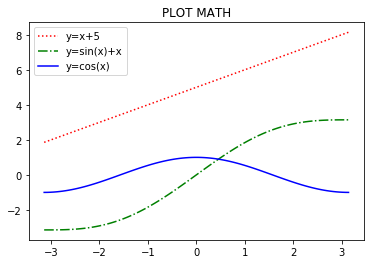

In [5]:
# No.5
# 多组数据
# 姓名:李昊佳
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(-np.pi,np.pi,100)
y1=x+5
y2=np.sin(x)+x
y3=np.cos(x)
plt.figure()
plt.plot(x,y1,color='red',label='y=x+5',linestyle = ':')
plt.plot(x,y2,color='g',label='y=sin(x)+x',linestyle = '-.')
plt.plot(x,y3,color='b',label='y=cos(x)')
plt.title("PLOT MATH")
plt.legend()
plt.show()

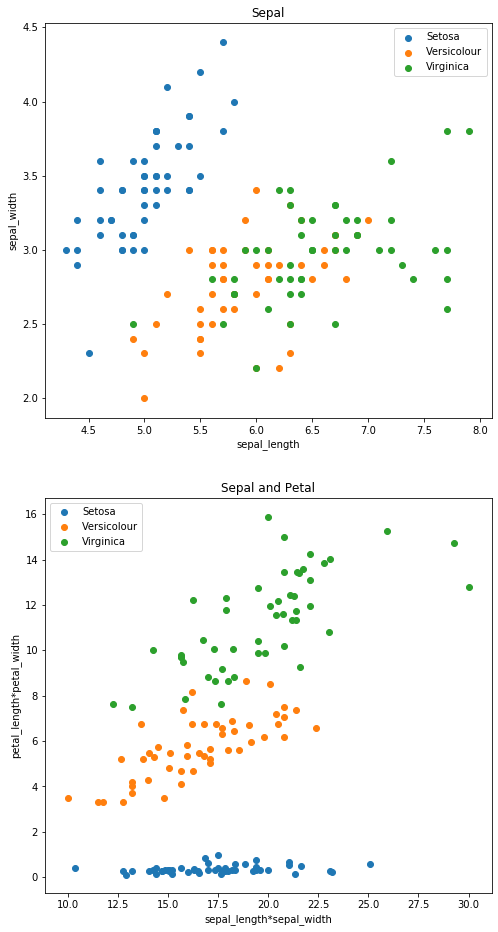

In [6]:
# No.6
# 数据集画图
# 姓名:李昊佳
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()
y_lable=["Setosa" , "Versicolour" , "Virginica"]
x_lable=["sepal_length","sepal_width","petal_length","petal_width"]

X = np.array(iris.data)
Y = np.array(iris.target)

plt.figure(figsize=(8,16))
plt.subplot(2,1,1)
for i in range(0,len(y_lable)):
    x=X[Y==i,:2]
    plt.scatter(x[:,0],x[:,1],label=y_lable[i])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.title("Sepal")
plt.legend()

plt.subplot(2,1,2)
for i in range(0,len(y_lable)):
    x=X[Y==i]
    plt.scatter(x[:,0]*x[:,1],x[:,2]*x[:,3],label=y_lable[i])
plt.xlabel("sepal_length*sepal_width")
plt.ylabel("petal_length*petal_width")
plt.title("Sepal and Petal")
plt.legend()

plt.show()

In [7]:
# No.7
# KNN
# 姓名:李昊佳
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
#knn类
class KnnClassifier():
    def __init__(self,dataset,target):
        self.target=np.array(target)
        self.dataset=np.array(dataset)

    def predict(self,testdata,k):
        # disttemp=(self.dataset-testdata)**2
        # distances=np.sqrt(disttemp.sum(axis=1))
        #利用范数求欧式距离
        distances=np.linalg.norm(self.dataset-testdata,axis=1)
        #对距离排序
        sortind=distances.argsort()
        #选出前k个
        sortind_k=sortind[:k]
        #利用字典统计出现个数
        counter={}
        for index in sortind_k:
            item=self.target[index]
            counter[item]=counter.get(item,0)+1
        # print(counter)
        return(max(counter,key=counter.get))

if __name__=="__main__":
    print("K-NearestNeighbor")
    iris = load_iris()

    X = np.array(iris.data)
    Y = np.array(iris.target)
    #注意打乱数据集，不然传入的数据不全
    rand_ind=np.random.permutation(X.shape[0])
    X_rand=X[rand_ind]
    Y_rand=Y[rand_ind]
    
    train_dataset=X_rand[:75]
    train_target=Y_rand[:75]
    print("训练集大小:",train_dataset.shape[0])
    #测试数据集
    test_dataset=X_rand[75:]
    test_target=Y_rand[75:]
    print("测试集大小:",test_dataset.shape[0])
    K=4
    testnum=test_target.shape[0]
    right_num=0
    wrong_num=0
    #加载数据
    knn=KnnClassifier(train_dataset,train_target)

    #测试性能
    for i in range(0,testnum):
        result=knn.predict(test_dataset[i],K)
        if(result==test_target[i]):
            right_num+=1
        else :
            wrong_num+=1
    
    print("正确率",right_num/testnum)


K-NearestNeighbor
训练集大小: 75
测试集大小: 75
正确率 0.9733333333333334


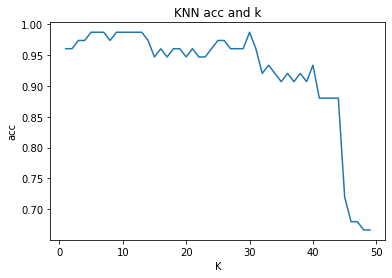

In [8]:
x=np.arange(1,50)
y=[]
for kk in range(1,50):
    right_num=0
    wrong_num=0
    for i in range(0,testnum):
        result=knn.predict(test_dataset[i],kk)
        if(result==test_target[i]):
            right_num+=1
        else :
            wrong_num+=1
    y.append(right_num/testnum)
plt.plot(x,y)
plt.title("KNN acc and k")
plt.ylabel("acc")
plt.xlabel("K")
plt.show()